Actividad:
En este ejercicio, se propone realizar un análisis de la frecuencia de palabras en los nombres de los pasajeros del Titanic utilizando técnicas de Procesamiento del Lenguaje Natural. El objetivo principal es comprender mejor la composición de los nombres y buscar posibles patrones o tendencias en ellos.

Para comenzar, se cargarán los datos del Titanic en un DataFrame, lo que nos permitirá acceder a la información relevante, como los nombres de los pasajeros. Luego, se procederá a extraer los nombres y aplicar técnicas de NLP para procesar y tokenizar los nombres en palabras individuales. Esto implica dividir los nombres en tokens y limpiarlos para eliminar palabras vacías, signos de puntuación y otros caracteres no deseados que podrían afectar el análisis.

Una vez que los nombres hayan sido procesados y tokenizados adecuadamente, se calculará la frecuencia de palabras utilizando un diccionario o la función Counter de Python. Esto nos permitirá identificar las palabras más comunes en los nombres de los pasajeros del Titanic y determinar su frecuencia relativa.

Para visualizar los resultados, se utilizarán gráficos como histogramas o nubes de palabras. Estas visualizaciones nos ayudarán a identificar las palabras más frecuentes de manera intuitiva y a comprender mejor la distribución de las mismas en los nombres de los pasajeros.

Además de analizar la frecuencia de palabras, se pueden explorar extensiones adicionales del ejercicio. Por ejemplo, se puede realizar un análisis de sentimientos en los nombres para determinar si algunas palabras tienen una connotación positiva o negativa. También se puede examinar la longitud de las palabras y su relación con la supervivencia de los pasajeros, lo que podría proporcionar información adicional sobre el perfil demográfico de los sobrevivientes.
Observe el siguiente script, complete y analice los resultados.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy


In [28]:
# Cargar los datos del Titanic
train_data = pd.read_csv("/content/titanic_train.xls")
test_data = pd.read_csv("/content/test.csv")


In [29]:
# Combinar los datos de entrenamiento y prueba
all_data = pd.concat([train_data, test_data], ignore_index=True)


In [30]:
# Cargar el modelo de lenguaje de spaCy para procesar nombres en inglés
nlp = spacy.load("en_core_web_sm")


In [31]:
# Función para procesar y limpiar los nombres utilizando spaCy
def process_names(name):
    # Analizar el nombre utilizando el modelo de spaCy
    doc = nlp(name)

    # Obtener los tokens limpios
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    return tokens



In [32]:
# Aplicar la función a cada nombre y combinar los tokens en una lista
# Aplicar la función a cada nombre y combinar los tokens en una lista
all_data['Name_Tokens'] = all_data['Name'].apply(process_names)

# Combinar todos los tokens en una lista
all_tokens = [token for name_tokens in all_data['Name_Tokens'] for token in name_tokens]

In [33]:
# Contar la frecuencia de cada palabra
word_freq = Counter(all_tokens)


In [34]:
# Seleccionar las palabras más comunes
common_words = word_freq.most_common(20) #Seleccione el número de las palabras comunes: se recomienda 20, para ver los nombres mas reptidos segun su frecuencia.


<ipython-input-35-e8d21feec056>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')


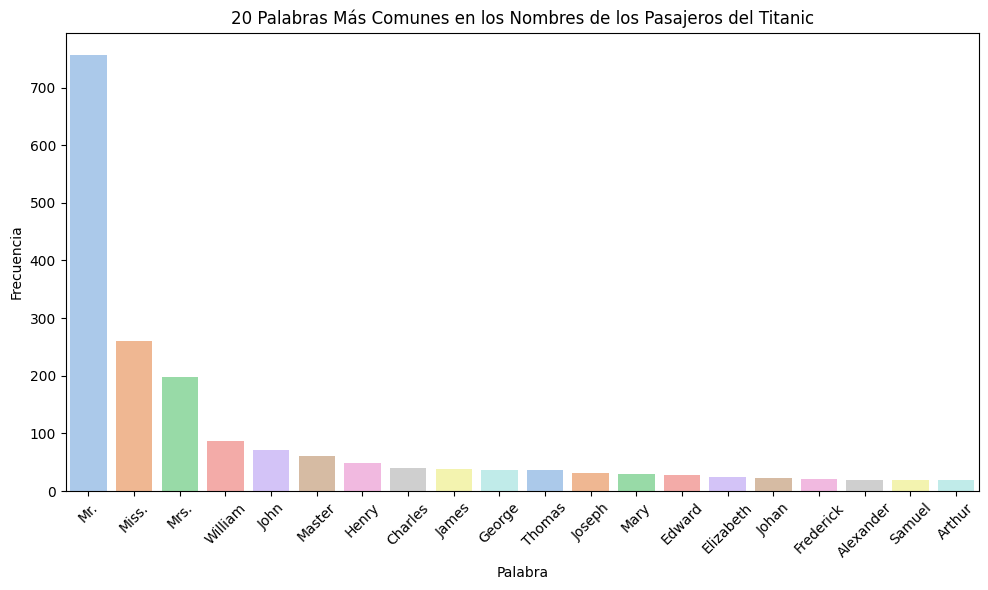

In [35]:
# Visualización de las palabras más comunes
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='pastel')
plt.title('20 Palabras Más Comunes en los Nombres de los Pasajeros del Titanic')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
